In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import AdaBoostRegressor
import time
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.pyplot as ax5

In [2]:
start_time = time.time()

In [3]:
dataset = pd.read_csv('hidrat_data.csv')

In [4]:
X = dataset.iloc[:,[1,2,4,5]].values
Y = dataset.iloc[:,[3]].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1234)

In [7]:
r= np.ptp(X_train,axis=0)
r

array([2.5459e+05, 2.6000e+01, 2.1000e+01, 1.0000e+00])

In [8]:
r= np.ptp(y_train,axis=0)
r

array([1414.942])

In [9]:
st_x = StandardScaler()
X_train=st_x.fit_transform(X_train)
st_y = StandardScaler()
y_train=st_y.fit_transform(y_train)

In [10]:
X_test=st_x.fit_transform(X_test)
y_test=st_y.fit_transform(y_test)

In [11]:
model = AdaBoostRegressor(n_estimators=100)

In [12]:
# fit the model on the whole dataset
model.fit(X_train, y_train)

C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(n_estimators=100)

In [13]:
# make a single prediction
# row = [[10,4.4,0,0]]
# yhat = model.predict(X_test)
# print('Prediction: %d' % yhat[0])

C:\Users\Asus\Anaconda3\envs\DeepLearning_Env\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


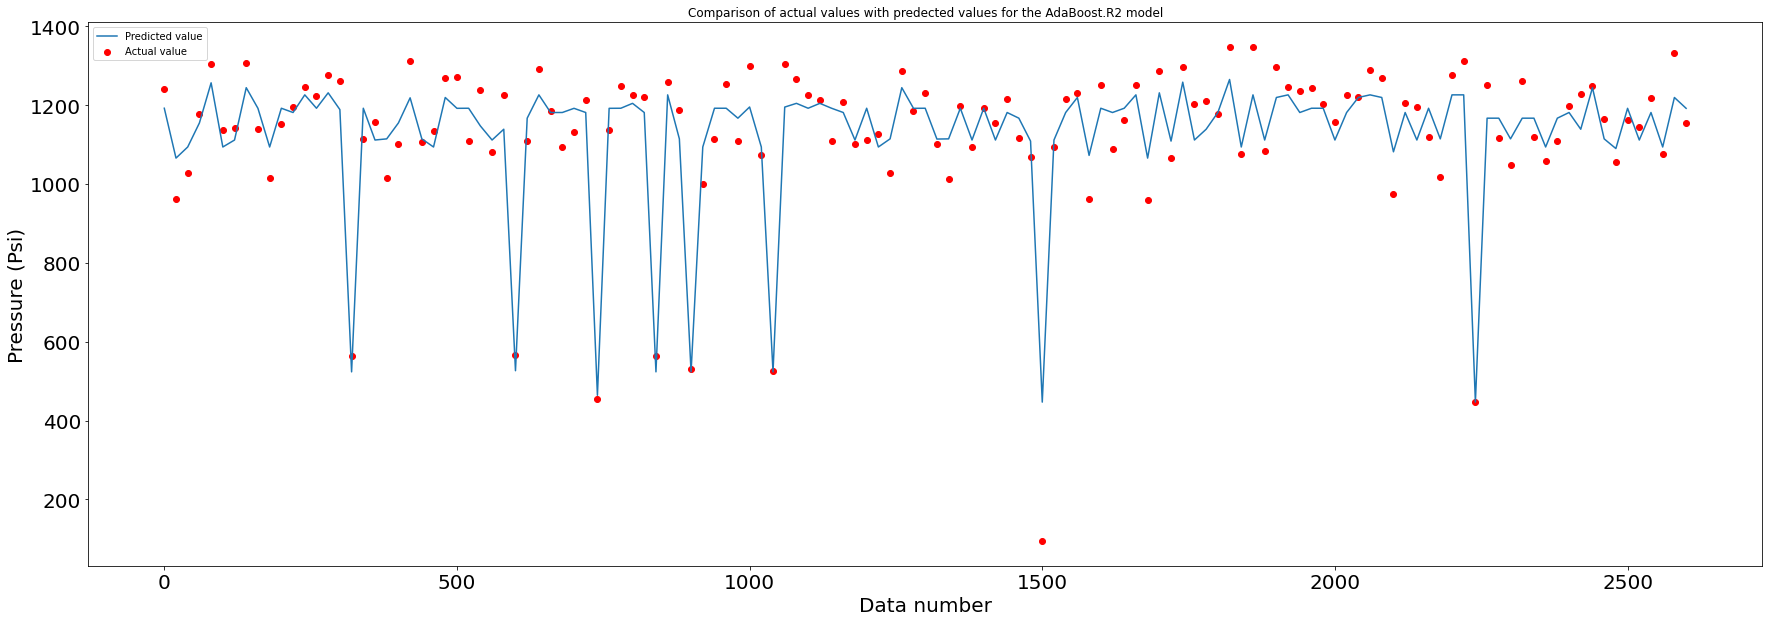

In [14]:
test_num = []
for i in range(len(y_test)):
    test_num.append(i)
test_num = test_num[::20]
model_predict = model.predict(X_test)
model_predict_train = model.predict(X_train)
model_predict = st_y.inverse_transform(model_predict)
y_test2 = st_y.inverse_transform(y_test)
model_predict2=model_predict[::20]
y_test_each20 = y_test2[::20]
fig = plt.figure(figsize=(30, 10))
ax2 = fig.add_subplot(111)
ax2.plot(test_num,model_predict2, label='Predicted value')
ax2.scatter(test_num,y_test_each20 , label = 'Actual value',color= 'red')
ax2.set_title('Comparison of actual values with predected values for the AdaBoost.R2 model')
ax2.set_xlabel('Data number',size=20)
ax2.set_ylabel('Pressure (Psi)',size=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
ax2.legend()
fig.show()

No handles with labels found to put in legend.


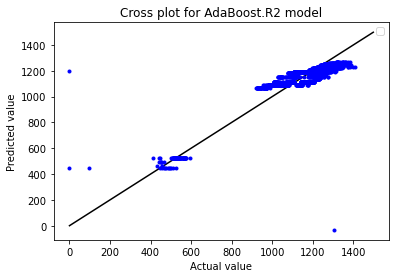

In [15]:
cross = []
i = 0
while i!=1500:
    cross.append(i)
    i = i+1
# fig2 = plt.figure(figsize=(10, 10))
# ax5 = fig.add_subplot(111)
ax5.plot(cross,cross, color='black')
ax5.plot(y_test2,model_predict,'bo', markersize=3, color='blue')
# ax5.plot(y_train,model_predict_train,'bo', markersize=3,label='Train Data', color='red',marker = '<')
ax5.title('Cross plot for AdaBoost.R2 model')
ax5.xlabel('Actual value')
ax5.ylabel('Predicted value')
ax5.legend()
# fig2.show()

In [16]:
r2_score(y_train, model.predict(X_train))

0.8767062309526255

In [17]:
sqrt(mean_squared_error(y_train, model.predict(X_train)))

0.35113212477267663

In [18]:
r2_score(y_test, model.predict(X_test))

0.8373280192898377

In [19]:
sqrt(mean_squared_error(y_test, model.predict(X_test)))

0.4033261468218522

In [20]:
time.time() - start_time

2.682981491088867